# CASA0006 - Data Science for Spatial Systems
# **Regression Models for House Price Prediction and Impact Factors Investigation in England**

### Student ID: 21047001
### Running Time: 5 min

| [1. Introduction](#1.-Introduction) | [2. Literature Review](#2.-Literature-Review) | [3. Research Question](#3.-Research-Question) | [4. Data](#4.-Data) | [5. Methodology](#5.-Methodology) | [6. Results and Discussion](#6.-Results-and-Discussion) | [7. Conclusion](#7.-Conclusion) | [Bibliography](#Bibliography) |

---

## 1. Introduction


The real estate market has always been a popular topic of nationwide concern in the UK. Trends in the market are not only of interest to buyers, homeowners analysts and policy makers, they also have potential contributions to economic development. Generally, house price may be determined by a variety of aspects, including the location, property type, investment prospects and supply and demand of the market, etc. (Phan, 2018). Therefore, it is necessary to precisely forecast the future housing price using scientific approach for optimising the decision making process. However, there are a vast amount of house price data produced every year, making sense of this huge dataset is challenging. Since there are numerous factors driving the variation of house prices, which triggers the demand of a forecasting model that can interpret the relationship between the variables and prices of house. Machine Learning (ML) has paved the way in this research context. Such technique can build model to learn from dataset, optimise its parameters and derive data-driven prediction.

Normally ML algorithms are splitted into three categories: supervised, unsupervised and reinforcement. The context house price forecasting is covered by supervised learning and will be suitable for regression model, since the data contains input and output variables. The detailed description of data will be presented in Section of Data. England house transaction data will be set as a study case to explore the prediction model. The goal of this study is to analyze the historical property transaction data to build regression models, then compare the results to obtain the optimal one and find the most influential factors on housing prices.

The code chunk below contains an overview of packages required for the analysis process.

In [1]:
! pip install XGBoost

In [2]:
! pip install rfpimp

In [3]:
# Import time for measuring the execution time of the program
import time
start_time = time.time()

# Import packages for data manipulation and processing
import numpy as np
import pandas as pd

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Import packages for regression models
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from itertools import cycle
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import rfpimp

# Other program settings
pd.set_option("display.max_rows", 300)  # specifies number of rows to show
pd.options.display.float_format = ("{:40,.4f}".format)  # specifies default number format to 4 decimal places
plt.style.use("ggplot")  # specifies that graphs should use ggplot styling
%matplotlib inline

## 2. Literature Review

There are already related studies on housing price prediction. Louati et al. (2022) developed a set of machine learning algorithms to increase the effectiveness of the land price estimation in Riyadh city, which included decision tree, random forest and linear regression. The results indicated that random forest provided the best performance, while the other two had the similar results. Avanijaa and Al (2021) applied XGBoost regression to estimate house price associated with location, neighbourhood  and infrastructure and suggested deep learning algorithms for boosting the prediction accuracy, although more data might  be required. Phan (2018) presented that support vector machine with mean squared error measurement was a powerful approach  when predicting Melbourne house price, while it was relatively difficult to interpret the model and spent more runtime in comparison with other regression including linear regression and regression tree etc. Adetunji et al. (2022) applied random forest model with Boston house price dataset, the predicted outcome had an acceptable error range compared with actual price.   

Based on the previous studies, the house price forecasting in England in this research will apply linear regression firstly to start test with a simple regression model, then more complicated machine learning method will be applied, including random forest and decision tree, to compare and obtain a relatively better prediction model.

## 3. Research Questions

According to the investigated dataset and the research process, the research questions are presented: is it possible to predict house price based on property transaction data by using linear regression, random forest and decision tree models? Which regression model can provide better prediction? Which variables can significantly impact the England house price?

## 4. Data

This section will present the data source, data cleaning, and data investigating and pre-processing processes.

The house price data is obtained from the UK Government website (GOV.UK., 2022), the most recent data in 2021 will be used for research since it could generate a forecast that would be closer to the present. The dataset contains England and Wales house transaction features which mainly include the unique id, sale price, date of transaction, location information, proper type, building age, tenure and type of Price Paid transaction. It will be cleaned and listed with details later in the subsection. 

### 4.1 Data Cleaning

Firstly, before importing the dataset, the column headers are added according to explanations of the website (GOV.UK., 2022).
Then import the dataset and check the column data types.

In [4]:
# Import the dataset
df = pd.read_csv("Data/Price_Paid_Data_2021.csv")
df

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type
0,{C6209F5F-3182-295E-E053-6C04A8C0DDCC},270000,2021/3/11 0:00,CM18 7JN,T,N,F,23,NaN,CORNER MEADOW,NaN,HARLOW,HARLOW,ESSEX,A
1,{C6209F5F-3184-295E-E053-6C04A8C0DDCC},246000,2021/6/4 0:00,SS8 8JW,D,N,F,22,NaN,LIMETREE ROAD,NaN,CANVEY ISLAND,CASTLE POINT,ESSEX,A
2,{C6209F5F-3185-295E-E053-6C04A8C0DDCC},250000,2021/4/9 0:00,CM2 8QL,T,N,F,25,NaN,THE STREET,GALLEYWOOD,CHELMSFORD,CHELMSFORD,ESSEX,A
3,{C6209F5F-3186-295E-E053-6C04A8C0DDCC},660000,2021/5/26 0:00,CO6 1QU,D,N,F,3,NaN,GARDENERS ROW,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
4,{C6209F5F-3187-295E-E053-6C04A8C0DDCC},567500,2021/4/9 0:00,SS6 9NS,D,N,F,6,NaN,SAXON CLOSE,NaN,RAYLEIGH,ROCHFORD,ESSEX,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944722,{CD5A9DCB-FAD5-310A-E053-6C04A8C00A1F},325000,2021/5/28 0:00,ME10 4AG,T,N,F,19,NaN,HONESTY CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,A
944723,{CD5A9DCB-FAD8-310A-E053-6C04A8C00A1F},355000,2021/5/28 0:00,ME12 3TD,D,N,F,31,NaN,CHARLOCK DRIVE,MINSTER ON SEA,SHEERNESS,SWALE,KENT,A
944724,{CD5A9DCB-FAD9-310A-E053-6C04A8C00A1F},540000,2021/6/25 0:00,TN9 2NJ,D,N,F,93,NaN,JUDD ROAD,NaN,TONBRIDGE,TONBRIDGE AND MALLING,KENT,A
944725,{CD5A9DCB-FADA-310A-E053-6C04A8C00A1F},175000,2021/7/14 0:00,CT17 9PU,D,N,F,7,NaN,QUEENS AVENUE,NaN,DOVER,DOVER,KENT,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944727 entries, 0 to 944726
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Transaction_unique_identifier  944727 non-null  object
 1   Price                          944727 non-null  int64 
 2   Date_of_Transfer               944727 non-null  object
 3   Postcode                       941896 non-null  object
 4   Property_Type                  944727 non-null  object
 5   Building_Age                   944727 non-null  object
 6   Tenure                         944727 non-null  object
 7   PAON                           944727 non-null  object
 8   SAON                           103127 non-null  object
 9   Street                         926258 non-null  object
 10  Locality                       360019 non-null  object
 11  Town/City                      944727 non-null  object
 12  District                       944727 non-nu

It can be noticed that several postcodes are missing in the summary table which should be excluded since only postcodes will be used among the location features which is for converting to coordinate data. And since only England data will be investigated, Wales data should be excluded as well.

In [6]:
# Drop rows with NA postcode
df = df.dropna(subset = ['Postcode']) 

# Drop rows with Wales Postcode
df = df[df.Postcode.str.startswith(('CF', 'LD', 'LL', 'NP', 'SA', 'SY')) == False]

df

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type
0,{C6209F5F-3182-295E-E053-6C04A8C0DDCC},270000,2021/3/11 0:00,CM18 7JN,T,N,F,23,NaN,CORNER MEADOW,NaN,HARLOW,HARLOW,ESSEX,A
1,{C6209F5F-3184-295E-E053-6C04A8C0DDCC},246000,2021/6/4 0:00,SS8 8JW,D,N,F,22,NaN,LIMETREE ROAD,NaN,CANVEY ISLAND,CASTLE POINT,ESSEX,A
2,{C6209F5F-3185-295E-E053-6C04A8C0DDCC},250000,2021/4/9 0:00,CM2 8QL,T,N,F,25,NaN,THE STREET,GALLEYWOOD,CHELMSFORD,CHELMSFORD,ESSEX,A
3,{C6209F5F-3186-295E-E053-6C04A8C0DDCC},660000,2021/5/26 0:00,CO6 1QU,D,N,F,3,NaN,GARDENERS ROW,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
4,{C6209F5F-3187-295E-E053-6C04A8C0DDCC},567500,2021/4/9 0:00,SS6 9NS,D,N,F,6,NaN,SAXON CLOSE,NaN,RAYLEIGH,ROCHFORD,ESSEX,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944722,{CD5A9DCB-FAD5-310A-E053-6C04A8C00A1F},325000,2021/5/28 0:00,ME10 4AG,T,N,F,19,NaN,HONESTY CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,A
944723,{CD5A9DCB-FAD8-310A-E053-6C04A8C00A1F},355000,2021/5/28 0:00,ME12 3TD,D,N,F,31,NaN,CHARLOCK DRIVE,MINSTER ON SEA,SHEERNESS,SWALE,KENT,A
944724,{CD5A9DCB-FAD9-310A-E053-6C04A8C00A1F},540000,2021/6/25 0:00,TN9 2NJ,D,N,F,93,NaN,JUDD ROAD,NaN,TONBRIDGE,TONBRIDGE AND MALLING,KENT,A
944725,{CD5A9DCB-FADA-310A-E053-6C04A8C00A1F},175000,2021/7/14 0:00,CT17 9PU,D,N,F,7,NaN,QUEENS AVENUE,NaN,DOVER,DOVER,KENT,A


Subsequently, from all the available features, the most relevant variables are identified for building the prediction model, and the rest are excluded as they are missing, duplicate or redundant. The variables listed below are those contribute to house price forecasting. It should be noticed that postcode is decided to represent property location rather than the other position information, which is because postcode is succinct and unique, and it will be converted to longitude and latitude in the later process.
- **Price**: sale price of the properties (*dependent variable*)
- **Date of Transfer**: date when the sale is finished, Year/Month/Day_Time (*independent variable*)
- **Postcode**: postcode of the properties (*independent variable*)
- **Property type**: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other  (*independent variable*)
- **Building age**: the age of the property, Y = a newly built property, N = an established residential building (*independent variable*)
- **Tenure**: tenure of the properties, F = Freehold, L= Leasehold (*independent variable*)


In [7]:
df = df.drop([
        "Transaction_unique_identifier",
        "PAON",
        "SAON",
        "Street",
        "Locality",
        "Town/City",
        "District",
        "County",
        "PPD_Category_Type",],axis=1,)

df

,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure
0,270000,2021/3/11 0:00,CM18 7JN,T,N,F
1,246000,2021/6/4 0:00,SS8 8JW,D,N,F
2,250000,2021/4/9 0:00,CM2 8QL,T,N,F
3,660000,2021/5/26 0:00,CO6 1QU,D,N,F
4,567500,2021/4/9 0:00,SS6 9NS,D,N,F
...,...,...,...,...,...,...
944722,325000,2021/5/28 0:00,ME10 4AG,T,N,F
944723,355000,2021/5/28 0:00,ME12 3TD,D,N,F
944724,540000,2021/6/25 0:00,TN9 2NJ,D,N,F
944725,175000,2021/7/14 0:00,CT17 9PU,D,N,F


Although the features have been refined, the data is still extremely large, which is about 900k rows. Using the entire dataset would be computationally challenging and significantly affect the program running and training time, and could even force stop the running program due to the limited memory of docker. Therefore, to improve the time and training efficiency, only 20 thousand sets of data are selected and would be enough for the model training and building. The data with na values will be excluded first, then the rows will be randomly selected to avoid data bias and inequity.

In [8]:
# Drop na values
df = df.dropna() 

In [9]:
# Set a random seed to enable reproducible sequence of random numbers
np.random.seed(10)

# Randomly select 20000 rows
df_subset = df.sample(n=20000)

df_subset

,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure
766120,72500,2021/4/28 0:00,TS12 2AL,T,N,F
513417,110000,2021/3/23 0:00,ST4 7EW,S,N,F
643478,261000,2021/3/4 0:00,PO1 3FT,F,N,L
834396,135000,2021/5/5 0:00,CO4 9YD,F,N,F
559621,370000,2021/8/6 0:00,CV5 9DW,S,N,F
...,...,...,...,...,...,...
168633,180000,2021/9/7 0:00,DY3 2PQ,O,N,F
302570,310000,2021/6/28 0:00,CT12 5AL,D,N,F
455460,650000,2021/6/30 0:00,SW9 0FA,F,N,L
574380,158000,2021/4/1 0:00,CV7 7JB,F,N,L


### 4.2 Data Investigating and Pre-processing

In order to apply the data for establishing prediction model, pre-processing is required.

Firstly, the transaction date should be converted from datetime data to numeric data. To simplify this, it is represented by the month of 2021.

In [10]:
# Transfer the datetime to month data
df_subset['Month'] = pd.DatetimeIndex(df_subset['Date_of_Transfer']).month 

# Drop the date of transfer column
df_subset = df_subset.drop(['Date_of_Transfer'], axis=1)

df_subset.head()

,Price,Postcode,Property_Type,Building_Age,Tenure,Month
766120,72500,TS12 2AL,T,N,F,4
513417,110000,ST4 7EW,S,N,F,3
643478,261000,PO1 3FT,F,N,L,3
834396,135000,CO4 9YD,F,N,F,5
559621,370000,CV5 9DW,S,N,F,8


Secondly, the postcode data is replaced by corresponding latitude and longitude data to capture the geographic differences in property price more effectively and conform with the requirement of model building.

The coordinate data is obtained from Geonames.org. (2022). As the data is too large, it was manually simplified to have only postcode, latitude and longitude columns, and was splitted into two parts and stored in my github repo.

In [11]:
# Read UK coordinates file into pandas DataFrame. The data link is: http://download.geonames.org/export/zip/

GBcoords1 = pd.read_csv("https://raw.githubusercontent.com/joeylizh/DSSS_Assessment/main/GBcoords1.csv")
GBcoords2 = pd.read_csv("https://raw.githubusercontent.com/joeylizh/DSSS_Assessment/main/GBcoords2.csv")


In [12]:
# Concat the two coordinate files
frames = [GBcoords1, GBcoords2]

GBcoords = pd.concat(frames)

In [13]:
# Merge the latitude and longitude data into the datasets
df_subset  = df_subset.merge(GBcoords, on='Postcode', how='left')

df_subset

,Price,Postcode,Property_Type,Building_Age,Tenure,Month,Latitude,Longitude
0,72500,TS12 2AL,T,N,F,4,54.5575,-0.9597
1,110000,ST4 7EW,S,N,F,3,53.0079,-2.1951
2,261000,PO1 3FT,F,N,L,3,50.8005,-1.1029
3,135000,CO4 9YD,F,N,F,5,51.9100,0.9163
4,370000,CV5 9DW,S,N,F,8,52.4332,-1.5664
...,...,...,...,...,...,...,...,...
19995,180000,DY3 2PQ,O,N,F,9,52.5172,-2.1306
19996,310000,CT12 5AL,D,N,F,6,51.3483,1.3845
19997,650000,SW9 0FA,F,N,L,6,51.4702,-0.1147
19998,158000,CV7 7JB,F,N,L,4,52.3827,-1.6415


In [14]:
# Drop the rows without coordinate values (since latitude and longitude are consistent, only dropping one is enough)
df_subset = df_subset.dropna(subset = ['Latitude']) 

# Drop the Postcode column
df_subset = df_subset.drop(['Postcode'], axis=1)

df_subset.head()

,Price,Property_Type,Building_Age,Tenure,Month,Latitude,Longitude
0,72500,T,N,F,4,54.5575,-0.9597
1,110000,S,N,F,3,53.0079,-2.1951
2,261000,F,N,L,3,50.8005,-1.1029
3,135000,F,N,F,5,51.9100,0.9163
4,370000,S,N,F,8,52.4332,-1.5664


In [15]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          19991 non-null  int64  
 1   Property_Type  19991 non-null  object 
 2   Building_Age   19991 non-null  object 
 3   Tenure         19991 non-null  object 
 4   Month          19991 non-null  int64  
 5   Latitude       19991 non-null  float64
 6   Longitude      19991 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.2+ MB


Ultimately, the rest binary categorical variables are converted to dummy variables. For building age, 0 represents 'N' (old), 1 represents 'Y' (new); for tenure, 0 represents 'L' (leasehold), 1 represents 'F' (freehold); for property type, each category creates a dummy variable respectively.

In [16]:
# Data of Building age is converted into Binary Data
df_one = pd.get_dummies(df_subset['Building_Age'])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_subset, df_one), axis=1)
 
# Column "Building_Age" is dropped
df_two = df_two.drop(['Building_Age'], axis=1)
 
# I want N (Old) = 0 and Y (New) = 1, so drop column "N" here
df_two = df_two.drop(['N'], axis=1)
 
# Rename the Column
df_numeric1 = df_two.rename(columns={'Y': "Building_Age"})

df_numeric1

,Price,Property_Type,Tenure,Month,Latitude,Longitude,Building_Age
0,72500,T,F,4,54.5575,-0.9597,0
1,110000,S,F,3,53.0079,-2.1951,0
2,261000,F,L,3,50.8005,-1.1029,0
3,135000,F,F,5,51.9100,0.9163,0
4,370000,S,F,8,52.4332,-1.5664,0
...,...,...,...,...,...,...,...
19995,180000,O,F,9,52.5172,-2.1306,0
19996,310000,D,F,6,51.3483,1.3845,0
19997,650000,F,L,6,51.4702,-0.1147,0
19998,158000,F,L,4,52.3827,-1.6415,0


In [17]:
# Data of Tenure is converted into Binary Data
df_three = pd.get_dummies(df_numeric1['Tenure'])
 
# Binary Data is Concatenated into Dataframe
df_four = pd.concat((df_numeric1, df_three), axis=1)
 
# Column "Tenure" is dropped
df_four = df_four.drop(['Tenure'], axis=1)
 
# L (Leasehold) =0 and F (Freehold) =1, o drop column "L" here
df_four = df_four.drop(["L"], axis=1)
 
# Rename the Column
df_numeric2 = df_four.rename(columns={"F": "Tenure"})

df_numeric2

,Price,Property_Type,Month,Latitude,Longitude,Building_Age,Tenure
0,72500,T,4,54.5575,-0.9597,0,1
1,110000,S,3,53.0079,-2.1951,0,1
2,261000,F,3,50.8005,-1.1029,0,0
3,135000,F,5,51.9100,0.9163,0,1
4,370000,S,8,52.4332,-1.5664,0,1
...,...,...,...,...,...,...,...
19995,180000,O,9,52.5172,-2.1306,0,1
19996,310000,D,6,51.3483,1.3845,0,1
19997,650000,F,6,51.4702,-0.1147,0,0
19998,158000,F,4,52.3827,-1.6415,0,0


In [18]:
# Create dummy variables for each category of property type
df_cleaned = pd.get_dummies(df_numeric2, columns = ['Property_Type'])

df_cleaned

,Price,Month,Latitude,Longitude,Building_Age,Tenure,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T
0,72500,4,54.5575,-0.9597,0,1,0,0,0,0,1
1,110000,3,53.0079,-2.1951,0,1,0,0,0,1,0
2,261000,3,50.8005,-1.1029,0,0,0,1,0,0,0
3,135000,5,51.9100,0.9163,0,1,0,1,0,0,0
4,370000,8,52.4332,-1.5664,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,180000,9,52.5172,-2.1306,0,1,0,0,1,0,0
19996,310000,6,51.3483,1.3845,0,1,1,0,0,0,0
19997,650000,6,51.4702,-0.1147,0,0,0,1,0,0,0
19998,158000,4,52.3827,-1.6415,0,0,0,1,0,0,0


In [19]:
# check out the new dataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            19991 non-null  int64  
 1   Month            19991 non-null  int64  
 2   Latitude         19991 non-null  float64
 3   Longitude        19991 non-null  float64
 4   Building_Age     19991 non-null  uint8  
 5   Tenure           19991 non-null  uint8  
 6   Property_Type_D  19991 non-null  uint8  
 7   Property_Type_F  19991 non-null  uint8  
 8   Property_Type_O  19991 non-null  uint8  
 9   Property_Type_S  19991 non-null  uint8  
 10  Property_Type_T  19991 non-null  uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 917.6 KB


After data conversion, the summary statistics of both dependent variable and independent variables are displayed below.

In [20]:
df_cleaned.describe()

,Price,Month,Latitude,Longitude,Building_Age,Tenure,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T
count,"19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000","19,991.0000"
mean,"399,903.8353",5.5356,52.3295,-1.1868,0.0316,0.7863,0.2420,0.1587,0.0413,0.2712,0.2867
std,"1,687,832.1083",3.0103,1.1577,1.2522,0.1748,0.4100,0.4283,0.3654,0.1990,0.4446,0.4522
min,100.0000,1.0000,50.0556,-5.6918,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"175,000.0000",3.0000,51.4317,-2.0964,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,"273,000.0000",6.0000,52.0812,-1.2341,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,"425,000.0000",8.0000,53.3817,-0.1914,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
max,"130,500,000.0000",12.0000,55.7725,1.7551,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Now check the NA values again among the dataset.

In [21]:
df_cleaned.isnull().sum()

Price              0
Month              0
Latitude           0
Longitude          0
Building_Age       0
Tenure             0
Property_Type_D    0
Property_Type_F    0
Property_Type_O    0
Property_Type_S    0
Property_Type_T    0
dtype: int64

As there is no NA values, now histograms are used to investigate the distribution of all the variables.

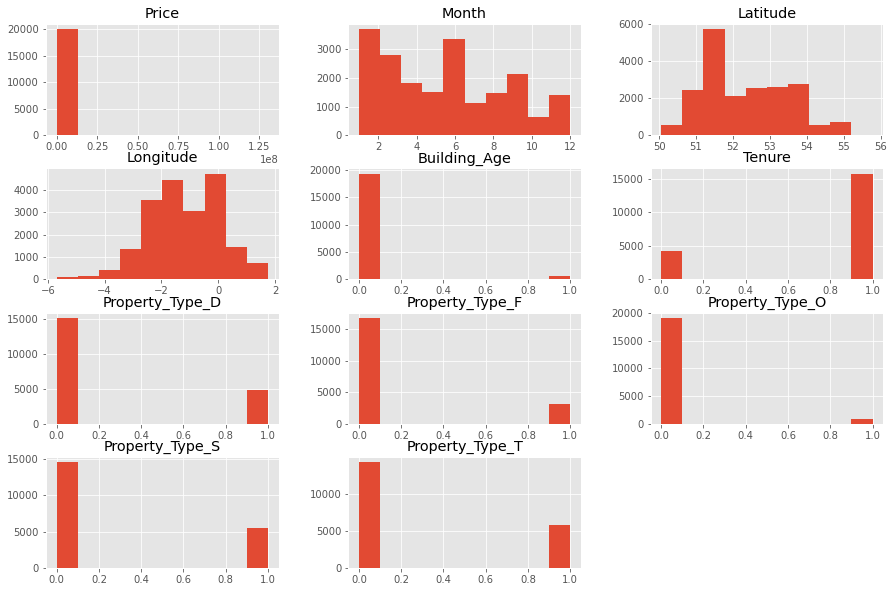

In [22]:
df_histogram = df_cleaned.hist(figsize = (15,10))

The strange situation is noticed here: the price graph almost displays only one bar. The reason might be that most of the house price gathering at a lower section, the outliers are too tiny to view on such limited distribution. Therefore, the plot method is changed and attempts log transform to compress the outliers and make a normal distribution.

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


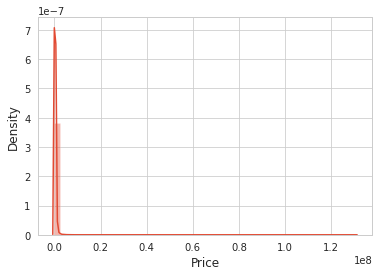

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


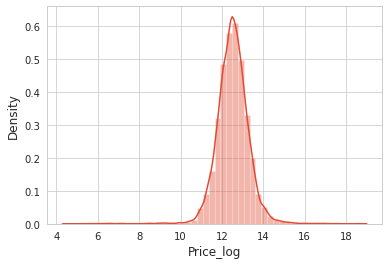

In [23]:
# Change the plot method
x = df_cleaned.Price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

# Create a log price variable
df_cleaned['Price_log'] = np.log(df_cleaned.Price)
x = df_cleaned.Price_log
sns.distplot(x)
plt.show()

df_cleaned = df_cleaned.drop(['Price'],axis=1,)

The outcome is quite good after transformation. Therefore, the log price will be used to replace price as the dependent variable.

## 5. Methodology

This section will separate the dataset into train, validation and test data subsets, multicollinearity will be checked to investigate the correlation between variables. Then models using linear regression with VIF, random forest and decision tree with hyperparameter tuning will be presented respectively.

### 5.1 Set Train, Validation and Test Subsets

Firstly,the dataset is splitted into train, validation and test subsets according to 70-15-15 split. The split is randomly processed to avoid selection bias. Random state is set here to ensure reproducibility.

In [24]:
X = df_cleaned.drop(['Price_log'], axis=1)
y = df_cleaned['Price_log']

print(X.shape)
print(y.shape)

(19991, 10)
(19991,)


In [25]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)

In [26]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(13993, 10)
(2999, 10)
(2999, 10)


### 5.2 Multicollinearity Checking

Subsequently, multicollinearity checking is conducted here by using correlation matrix, in order to examine whether there are highly correlated variables. This method is only for viewing the rough correlation rather than removing variables. It can be seen from the matrix that property type D and tenure might have relatively higher correlation with tenure. Accurate calculation will be conducted by VIF method.

Text(0.5, 1.0, 'Correlation Matrix')

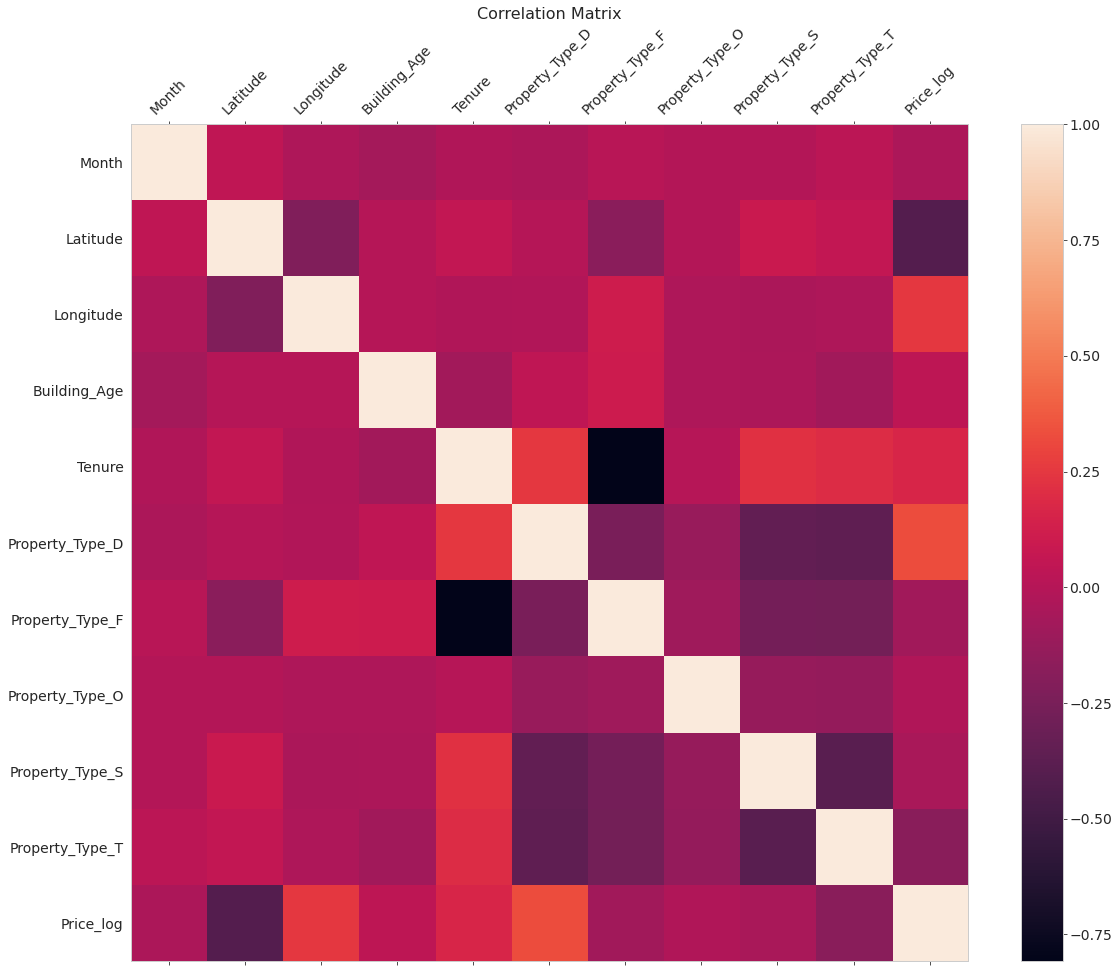

In [27]:
df = df_cleaned
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### 5.3 Linear Regression with VIF

For model establishment, it should be started with the simplest linear regression. In this subsection, the Variance Inflation Factor (VIF) method is firstly used to deal with the multicollinearity between the independent variables. The higher the VIF value, the more it needs to be removed. The code for using VIF method is below:

In [28]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [29]:
# Using VIF on the cleaned price paid dataset

train_x_VIF = drop_column_using_vif_(X_train, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: inf
Dropping: Property_Type_D
Max VIF: 3.680428231399136
The columns remaining after VIF selection are:
Index(['Month', 'Latitude', 'Longitude', 'Building_Age', 'Tenure',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


After removing the highly correlated variable, multiple linear regression can be conducted.

In [30]:
# Using linear regression for fitting
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=y_train)

LinearRegression()

Then check the intercept value and coefficients.

In [31]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  26.087078924112365
               var                                     coef
0            Month                                   0.0006
1         Latitude                                  -0.2514
2        Longitude                                   0.1086
3     Building_Age                                   0.1023
4           Tenure                                   0.1543
5  Property_Type_F                                  -0.6124
6  Property_Type_O                                  -0.5511
7  Property_Type_S                                  -0.4428
8  Property_Type_T                                  -0.6107


Next, R2 score will be generated to explore the model performance.

In [32]:
# fit a linear regression model using statsmodel
regressor_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     725.3
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:36:31   Log-Likelihood:                -13402.
No. Observations:               13993   AIC:                         2.682e+04
Df Residuals:                   13983   BIC:                         2.690e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.0871      0.256    102.080      0.000      25.586      26.588
Month               0.0006      0.002      0.312      0.755      -0.003       0.004
Latitude           -0.2514      0.005    -51.989      0.000      -0.261      -0.242
Longitude           0.1086      0.004     24.631      0.000       0.100       0.117
Building_Age        0.1023      0.031      3.273      0.001       0.041       0.164
Tenure              0.1543      0.023      6.789      0.000       0.110       0.199
Property_Type_F    -0.6124      0.028    -21.850      0.000      -0.667      -0.558
Property_Type_O    -0.5511      0.029    -19.127      0.000      -0.608      -0.495
Property_Type_S    -0.4428      0.015    -29.546      0.000      -0.472      -0.413
Property_Type_T    -0.6107      0.015    -41.219      0.000      -0.640      -0.582
==============================================================================
Omnibus:                     2968.795   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115711.843
Skew:                          -0.148   Prob(JB):                         0.00
Kurtosis:                      17.085   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It could be seen from the summary that R2 is 0.318, which is a quite low value. It indicates that only 31.8% of the variance in house price prediction can be explained by the model, and the model is not well fitted with high bias. In addition, as the 'Month' variable has a p-value higher than 0.05, it is not a significant variable. The others are significant.

The test and validation data should produce the same results.

In [33]:
# select the same columns from X_test as train_x_VIF
test_x_VIF = X_test[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=y_test)

0.3193522824147049

In [34]:
# select the same columns from X_val as train_x_VIF
val_x_VIF = X_val[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=val_x_VIF, y=y_val)

0.3238806077841293

It can be noticed that the three sets generate similar values with a slight difference. The linear regression with VIF has a high bias for the house price prediction.

### 5.4 Random Forest

This section will establish a random forest model to fit the dataset.

In [35]:
# Fitting a random forest model
reg_random_forest = RandomForestRegressor(random_state=0)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [36]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X=X_test, y=y_test))

R2 on the training data:
0.9330459321796591
R2 on the testing data:
0.5303438929478308


It shows the R2 of test data is much lower than the training data, which reveals overfitting issue, however, it also shows lower bias than linear regression model.

As the RF model has too many trees and leaves, visualization will not be helpful. Instead, the Permutation Feature Importance (PFI) is introduced to explore the feature importance.

                                              Importance
Feature                                                 
Latitude                                          0.8034
Longitude                                         0.3613
Property_Type_D                                   0.3063
Tenure                                            0.1412
Property_Type_S                                   0.0570
Property_Type_O                                   0.0213
Month                                             0.0162
Property_Type_T                                   0.0042
Property_Type_F                                   0.0036
Building_Age                                      0.0010


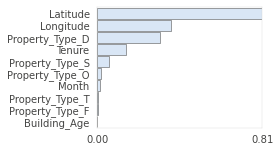

In [37]:
#  Plotting feature importance
imp = rfpimp.importances(reg_random_forest, X_test, y_test) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

The top features are latitude, longitude and property type D. The model demonstrates these variables are the most important factors when predicting the house price.

#### Hyperparameter Optimization Using Cross-validation

As there is still an overfitting problem, cross validation is applied, as it is a robust method to tune the model hyperparameters through optimizing model performance with the development dataset.

In [38]:
# Merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [39]:
%%time

# values of n_estimators
list_n_estimators = [50, 100, 200, 300, 400]

# create a grid of the two hyperparameters
parameters = {'n_estimators':list_n_estimators}

random_state_rf = 50
rf = RandomForestRegressor(random_state_rf)

# rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# Query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 300}
The best score is: 
0.5426497488865073
CPU times: user 3min 17s, sys: 2.72 s, total: 3min 20s
Wall time: 3min 20s


The optimised score varies slightly with the number of trees. It shows that the model is robust enough.
It looks like the training and development scores do not change significantly with the number of trees, which means that the model is quite robust to this number of trees in the random forest.

In [40]:
# Calculate the improved random forest model
rf_final_model = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], random_state=random_state_rf)
rf_final_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=50)

In [41]:
print('The score on the training data:')
print(rf_final_model.score(X_train, y_train))
print('The score on the development data:')
print(rf_final_model.score(X_val, y_val))
print('The score on the test data:')
print(rf_final_model.score(X_test, y_test))

The score on the training data:
0.9353097265092534
The score on the development data:
0.5422682286207768
The score on the test data:
0.5269500807407599


The variation between final model and the orginal one is slight as the model is robust enough.

### 5.5 GBDT and XGBoost

Ultimately, decision tree model will be built to prediction of house price.

In [42]:
# Fitting a GBDT model

random_state_xgb = 200

xgb_model = xgb.XGBRegressor(random_state = random_state_xgb)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=200,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))

R2 on the training data:
0.7958508003522082
R2 on the testing data:
0.4733280734736046


The R2 of both data indicates slightly lower values than random forest but larger than linear regression model, and there is also a similar value difference between training data and testing data as random forest. It implies a relatively higher variance and lower bias.

Next, PFI is also applied to investigate the feature importance here.

                                              Importance
Feature                                                 
Latitude                                          0.9148
Longitude                                         0.4630
Property_Type_D                                   0.2333
Property_Type_O                                   0.1626
Tenure                                            0.1186
Month                                             0.0809
Property_Type_S                                   0.0224
Property_Type_F                                   0.0219
Property_Type_T                                   0.0127
Building_Age                                      0.0052


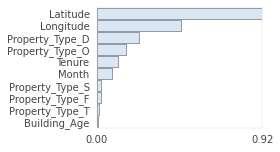

In [44]:
#  Plotting feature importance
imp = rfpimp.importances(xgb_model, X_train, y_train) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

The order of the top features is the same as random forest, which also proves they are the critical variables.


#### Hyperparameter Optimization Using Holdout Validation

To optimise the model, holdout validation is applied instead of cross validation. Although the later one is robust, the program is cut off and restart due to the large data and docker memory limi. Therefore, holdout validation is used.

In [45]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [46]:
# values of n_estimators
parameters = {'n_estimators':[10,30,50,70,100]}

randomState_xgb = 100
xgb = RandomForestRegressor(random_state=randomState_xgb)

# CV: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(xgb, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# Query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 100}
The best score is: 
0.5395132800490139


The score after improvement is better than the original one. Now check the final scores.

In [47]:
xgb_final_model = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final_model.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [48]:
print('The score on the training data:')
print(xgb_final_model.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final_model.score(X_val, y_val))
print('The score on the test data:')
print(xgb_final_model.score(X_test, y_test))

The score on the training data:
0.9356224019498546
The score on the development data:
0.5395132800490139
The score on the test data:
0.5283065261171771


The final R2 values are quite close to that generated by random forest, which indicates the robustness of the model.

## 6. Results and Discussion

As linear regression, random forest and decision tree have all been built, the code below will collate the model results to compare the performance.

In [49]:
# Create a list of models
list_name_models = ['LR_VIF', 'RF', 'GBDT']
# use the models from above
list_reg_models = [lr, rf_final_model, xgb_final_model]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, y_train), model.score(test_x_VIF, y_test), model.score(train_x_VIF, y_train) - model.score(test_x_VIF, y_test)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test), model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
print(df_models)

                                  R2_train_data  \
LR_VIF                                   0.3182   
RF                                       0.9353   
GBDT                                     0.9356   

                                   R2_test_data  \
LR_VIF                                   0.3194   
RF                                       0.5270   
GBDT                                     0.5283   

                                        R2_diff  
LR_VIF                                  -0.0011  
RF                                       0.4084  
GBDT                                     0.4073  


From the summary above, it can be investigated that linear regression model is not fitted for this prediction as the R2 is the smallest. Although the difference between training data and testing data is tiny which reveals low variance, the high bias results lead to a non-robust model. To improve its performance, more relevant features such as room type, house area and neighborhood infrastructure etc. should be involved for analysis.

The random forest and decision tree models are higher than the linear regression, and produced similar results. The slight difference can be ignored since there is a variation among each time of running. The R2 values of training data are normally higher because of overfitting, and the larger R2 comparing with linear regression indicates relatively lower bias. however, since there is still a difference between training data and testing data, high variance is a problem. More training data can be added for improvement.

Another potential reason for the regression results is the outliers, which normally contain an extremely small number of high or low values. The outliers of dependent variable are processed by log method to gain a normally distributed plot. However, outliers from independent variables were not considered in the data manipulation process. It could be checked through box plot and removed the abnormal values.

The most important variables impact England's house price are gained: latitude, longitude and detached property. It could be understandable that location generally is the main driver of house price, the closer the area is to the convenience of living or economically developed areas, the higher the price tends to be. This is critical to forecast price in a certain district. Besides, detached house is the other important feature of price, this type of property tends to have more building area and living facilities, the target clients are mostly wealthy groups with certain assets. Therefore, there is a strong correlation between detached house and price variation.

### Limitation

There are also some limitations during the research. Firstly, the number of variables is finite and fixed in the dataset, which might lead to high bias of the model. Secondly, although more training data can enable the model more robust, the dataset is too large and exceeds the docker memory limit, resulting in my notebook corrupted after an attempt of running. Therefore, the cross validation cannot apply twice, and neural network cannot apply to this prediction program as insufficient dataset. Subsequently, the property price variation is relevant to the economic trends and has a significant time-varying. An appropriate prediction may need more robust data and more complex deep learning models to train the data.

## 7. Conclusion

To conclude, housing price involves multiple interests and it is necessary to accurately predict the value. There are various factors affecting the price tendency, several studies have already applied machine learning algorithms to predict house price. This research aims to explore an appropriate regression model for England house price prediction and find out the impact factors. The research uses historical property transaction data in 2021 for manipulation. The data is cleaned and pre-processed with only valuable variables and limited dataset left, then the data is split into training, validation and testing datasets for model fitting. Three regression models are being applied: linear regression with VIF, random foreest and decision tree. The results indicate that linear regression is badly fitted for the context, while random forest and decision tree provide the same prediction with relatively high variance after hyperparameter tuning. Improvement is needed to add more training data. The most important factors of house price investigated in the research are latitude, longitude and detached property. There are also some limitations of the research presented, including finite dataset, limited features, docker memory limit and limited regression models.

In [50]:
# Print the program running time
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

Total run time:  279.0114345550537 seconds


*(word count: 2621)*

## Bibliography

Adetunji, A.B. et al. (2022) ‘House Price Prediction using Random Forest Machine Learning Technique’, Procedia Computer Science, 199, pp. 806–813. doi:10.1016/j.procs.2022.01.100.

Avanijaa, J. and Al, E. (2021) ‘Prediction of House Price Using XGBoost Regression Algorithm’, Turkish Journal of Computer and Mathematics Education (TURCOMAT), 12(2), pp. 2151–2155. doi:10.17762/turcomat.v12i2.1870.

Geonames.org. (2022) GeoNames. [online] Available at: <http://download.geonames.org/export/zip/> [Accessed 17 April 2022].

GOV.UK. (2022) Price Paid Data. [online] Available at: <https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads> [Accessed 16 April 2022].

Louati, A. et al. (2022) ‘Price forecasting for real estate using machine learning: A case study on Riyadh city’, Concurrency and Computation: Practice and Experience, 34(6), p. e6748. doi:10.1002/cpe.6748.

Phan, T.D. (2018) ‘Housing Price Prediction Using Machine Learning Algorithms: The Case of Melbourne City, Australia’, in 2018 International Conference on Machine Learning and Data Engineering (iCMLDE). 2018 International Conference on Machine Learning and Data Engineering (iCMLDE), pp. 35–42. doi:10.1109/iCMLDE.2018.00017.